#### Texto sobre la ultima temporada de TWD, extraeremos los conceptos más importantes de este y lo resaltaremos en un diagrama 

In [3]:
#Comenzamos extrayendo la URL del articulo a analizar
url = 'https://www.star-latam.com/novedades/the-walking-dead-temporada-11-cuantos-episodios-tendra-la-segunda-parte#:~:text=La%20exitosa%20serie%20de%20zombies%2C%20que%20vuelve%20con%20más%20aventuras,que%20dejó%20varias%20incógnitas%20abiertas.'


# 1) Obtenemos la data

In [5]:
import requests
text = requests.get(url).content.decode('utf-8') #Extraemos toda la informacion del articulo y la decodificamos

# Transformamos la Data
Hemos descargado la información del articulo en un formato HTML, necesitamos convertirla a texto plano

In [8]:
from html.parser import HTMLParser
class MyHTMLParser(HTMLParser):
    script = False
    res = ""
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script","style"]:
            self.script = True
    def handle_endtag(self, tag):
        if tag.lower() in ["script","style"]:
            self.script = False
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res += ' '+data.replace('[ edit ]','')
parser = MyHTMLParser()
parser.feed(text)
text = parser.res
print(text)

  The Walking Dead Temporada 11: cuántos episodios tendrá la segunda parte | Star Latinoamérica STAR+ Suscríbete ahora Acerca de Star+ Combo+ Preguntas Frecuentes NOVEDADES TV Ver todo TV Star Channel Star Life ESPN Más Explorar Ver más SUSCRÍBETE A   NOVEDADES STAR+ The Walking Dead  Temporada 11: cuántos episodios tendrá la segunda parte 17 de febrero de 2022 Conoce más sobre cómo se encuentra dividida la temporada que marcará el fin de la exitosa serie de zombies. The Walking Dead  estrena la segunda parte de su temporada final este mes y puedes encontrarla de forma exclusiva en  Star+ . El próximo  20 de febrero  se libera el  primero de los ocho episodios  que conforman la nueva entrega.  La exitosa  serie de zombies , que vuelve con más aventuras y desafíos para sus protagonistas, llega a su fin con la onceava temporada, que cuenta con  24 episodios  y se divide en  tres partes . El 23 de agosto de 2021 inició el estreno de la primera parte que dejó varias  incógnitas  abiertas. 

# Extraer datos clave
Extraeremos datos clave del texto y veremos cuales son más significativos, estableceremos un minimo de longitud de la palabra de 5 caracteres, un minimo de frecuencia de 1 a 3 vez en el documento y un máximo de 2 palabras por keyword

In [9]:
import nlp_rake
extractor = nlp_rake.Rake(max_words=2,min_freq=3,min_chars=5)
res = extractor.apply(text)
res

[('temporada final', 3.625),
 ('star+', 1.0),
 ('protagonistas', 1.0),
 ('abril', 1.0)]

# Visualizar los datos extraidos

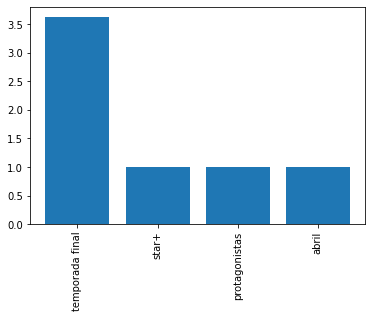

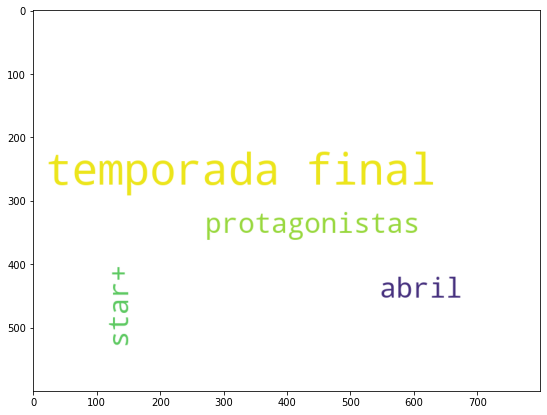

In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
def plot(pair_list):
    k,v = zip(*pair_list)
    plt.bar(range(len(k)),v)
    plt.xticks(range(len(k)),k,rotation='vertical')
    plt.show()
plot(res)
wc = WordCloud(background_color='white',width=800,height=600)
plt.figure(figsize=(15,7))
plt.imshow(wc.generate_from_frequencies({ k:v for k,v in res }))